## Writing to Files and Reading from Them

So far, we have been working in "console world", a world where we print our output to our Jupyter notebeook cells, and we are happy to do it. But that has it's limitations. What makes these techniquest powerful, is our ability to save files to be accessed later, and to grab data and files from our computers or from data on the internet, or the world wide infonet as it was once called, albeit briefly.

Let's go there! 

### Writing to a File:

#### Some basics: 
Following the "law of primacy" ie; what you first learn you will remember most...here is the correct format for writing to a file:


In [2]:
# Define the filename and content from a world leader's speech (FDR's inaugural address in this case)
filename = 'first_lines_leader.txt'
content = '''So, first of all, let me assert my firm belief that the only thing we have to fear is…fear itself — nameless, 
unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life 
a leadership of frankness and of vigor has met with that understanding and support of the people themselves which is essential to victory.'''

# Write the content to the specified file
with open(filename, 'w') as file:
    file.write(content)

# Confirm successful file creation
print(f"Content written to {filename} successfully.")


Content written to first_lines_leader.txt successfully.


### Let's break it down:

1. Filename and content as variables:
I assigned 'example.txt' to the filename variable and the string to the content variable. This is good practice because it makes the code more flexible and easier to modify.

2. with open('filename', 'w') as file:
This opens (or creates) a file named 'filename' in write mode ('w'), which will overwrite any existing content in the file.
file is the file object you are working with. The file is automatically closed after the block.

3. The content is then written to the file object you created. By the way you can call "file" anything. Lot's of times I'll write "fo" or even f

4. A print statement confirms it worked.


### Oh....Did you find your file in your finder? Assuming the answer is "yes"...good job! Now let's grab that content and read it to the console


In [5]:
#Below:
#filename is a string that holds the name of the file.
#file is the file object created by open(filename, 'r').
#The file.read() method reads the content of the file.
#The print(content) prints out what was read from the file.

with open(filename, 'r') as file:
    content = file.read()
print(content)

So, first of all, let me assert my firm belief that the only thing we have to fear is…fear itself — nameless, 
unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life 
a leadership of frankness and of vigor has met with that understanding and support of the people themselves which is essential to victory.


### Read vs Readlines
Above, we see that we can grab all the content of the fie using read(). This is a great way to go if we want to work with the file content as a whole, for example, searching for a word in the entire file, or processing word frequency distribution on a presidential speech.

But what if the the file is very large? Teading the entire content into memory can be inefficient or even cause memory issues. 

Or what if we want to process the file line by line and pull out spaces, or other extraneous info that we don't want? 

Readlines to the rescue! 
Readlines reads the file line by line and returns a list of strings, where each string represents a line from the file.

Use readlines() when you need to work with the file line by line, and you want to process or iterate over the lines.

Here is an example:

In [7]:
with open(filename, 'r') as file:
    lines = file.readlines()  # Reads the file and returns a list of lines
for line in lines:
    print(line.strip())  # Strip removes newline characters

So, first of all, let me assert my firm belief that the only thing we have to fear is…fear itself — nameless,
unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life
a leadership of frankness and of vigor has met with that understanding and support of the people themselves which is essential to victory.


### Alternative for very large files: 
I want to introduce you to this idea, because ChatGPT might suggest it, so I want you to be exposed and know what's going on.
For very large files, neither read() nor readlines() may be efficient. Instead, you can read the file line by line without loading the whole file into memory using what is called a file object iterator:



In [9]:
with open(filename, 'r') as file:
    for line in file:
        print(line.strip())

So, first of all, let me assert my firm belief that the only thing we have to fear is…fear itself — nameless,
unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life
a leadership of frankness and of vigor has met with that understanding and support of the people themselves which is essential to victory.


That said, you should use read() or readlines() in the majority of your cases as your file size will be moderately large at most.

### Some summary:

Opening a File:

Modes:
'r' = read
'w' = write (overwrites the file if it exists)
'a' = append (adds to the end of the file)
'b' = binary mode (for non-text files)



## All the President's Speeches 
20 pts

As we learned on Thursday, word frequency distribution is an intuitive way of determining the major themes, topics, or even preoccupations of the speech giver.

Pull texts from different US presidents and use FreqDist() to gain insights into the data. This is a fairly open assignment. The goal is to identify something interesting! Pull the text, tokenize, remove stopwords, and plot the frequency of the words. That's the technical part. But much of this assignment is your ability to use word frequency to gain insights comparatively, intra or inter presidents. Let the python notebook from our lecture be your guide! The more interesting and creative the analysis, the more points you will receive. We might pick one student's analysis to be displayed in lecture, and that person will receive bonus credit for the work.

For full credit, please demonstrate the use of read(), readlines(), and write() to a file in this assignment. Where you do it? Up to you!

In [13]:
# Importing necessary libraries: nltk for natural language processing, matplotlib for data visualization
import nltk
from nltk import FreqDist  # Frequency distribution tool for counting word occurrences
from nltk.tokenize import word_tokenize  # Function to tokenize text into individual words
from nltk.corpus import inaugural  # Corpus of US presidential inaugural speeches
import matplotlib.pyplot as plt  # Plotting library for visualizing data
from nltk.corpus import stopwords # Stopwords

In [14]:
# Retrieve the list of English stopwords from the NLTK corpus
stopwords = nltk.corpus.stopwords.words("english")

# Define additional custom stopwords, including punctuation and common words from the inaugural speeches
new_stops = [",", "I", ".", ";", "-", "'", ":", "The", "And", '--', 'shall', 'may', 'every', 'It', 'In']

# Extend the original stopword list with the new custom stopwords
stopwords.extend(new_stops)

# Print the updated stopwords list to verify it includes the new additions
print(stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Inaugural speeches by political party

Republicans = ['1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt',
               '1889-Harrison.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1921-Harding.txt', 
               '1925-Coolidge.txt', '1929-Hoover.txt','1953-Eisenhower.txt', '1957-Eisenhower.txt','1969-Nixon.txt', '1973-Nixon.txt',
               '1981-Reagan.txt', '1985-Reagan.txt', '1989-Bush.txt', '2001-Bush.txt', '2005-Bush.txt','2017-Trump.txt']

Democrats = ['1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt','1845-Polk.txt','1853-Pierce.txt', '1857-Buchanan.txt', 
             '1885-Cleveland.txt','1893-Cleveland.txt','1913-Wilson.txt', '1917-Wilson.txt','1933-Roosevelt.txt', '1937-Roosevelt.txt', 
             '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1961-Kennedy.txt', '1965-Johnson.txt','1977-Carter.txt',
             '1993-Clinton.txt', '1997-Clinton.txt','2009-Obama.txt', '2013-Obama.txt','2021-Biden.txt']

Content written to Repub_Speeches.txt successfully.
[('people', 266), ('government', 264)]


<Axes: xlabel='Samples', ylabel='Counts'>

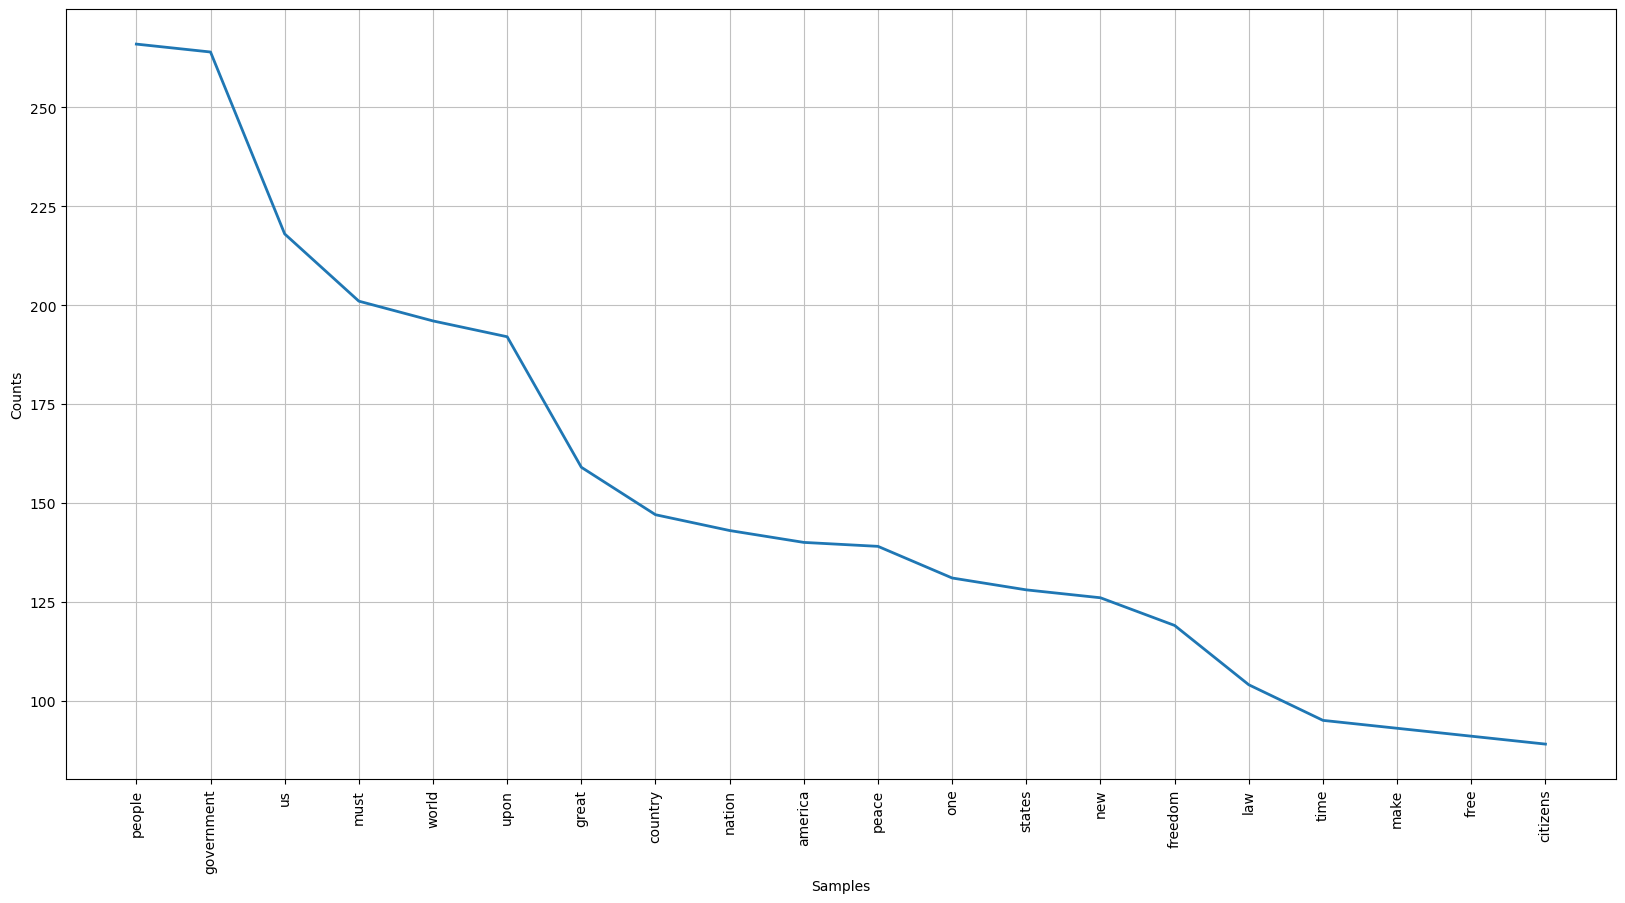

In [16]:
# Most common words in Republican speeches
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize

# Setting the plot size for the frequency distribution graph
plt.figure(figsize=(20, 10))

# Initialize an empty list to store words from Republican speeches
repub_words = []

# Loop through each president in the 'Republicans' list and extract words from their speeches
for president in Republicans:
    repub_words += list(inaugural.words(president))

# Convert the list of words into a single string (repub_text)
repub_text = ' '.join(repub_words)

# Write the concatenated Republican speeches to a text file
elephant = 'Repub_Speeches.txt'
with open(elephant, 'w') as file:
    file.write(repub_text) 
print(f'Content written to {elephant} successfully.')

# Tokenize the text into words, splitting by space (though word_tokenize() is usually preferred)
fdist = FreqDist(repub_text.split())

# Filter out stopwords from the list of Republican words (ensure words are lowercase for comparison)
clean_repub = [word.lower() for word in repub_words if word.lower() not in stopwords]

# Calculate the frequency distribution of the cleaned words
fdist2 = FreqDist(clean_repub)

# Print the two most common words
x = fdist2.most_common(2)
print(x)

# Plot the 20 most common words from the cleaned Republican speeches
fdist2.plot(20)


In [17]:
# Here's where I used readlines
with open(elephant, 'r') as file:
    lines1 = file.readlines()  # Reads the file and returns a list of lines
for line in lines:
    print(line.strip())  # Strip removes newline characters

So, first of all, let me assert my firm belief that the only thing we have to fear is…fear itself — nameless,
unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life
a leadership of frankness and of vigor has met with that understanding and support of the people themselves which is essential to victory.


Content written to Dem_Speeches.txt successfully.
[('people', 223), ('us', 223)]


<Axes: xlabel='Samples', ylabel='Counts'>

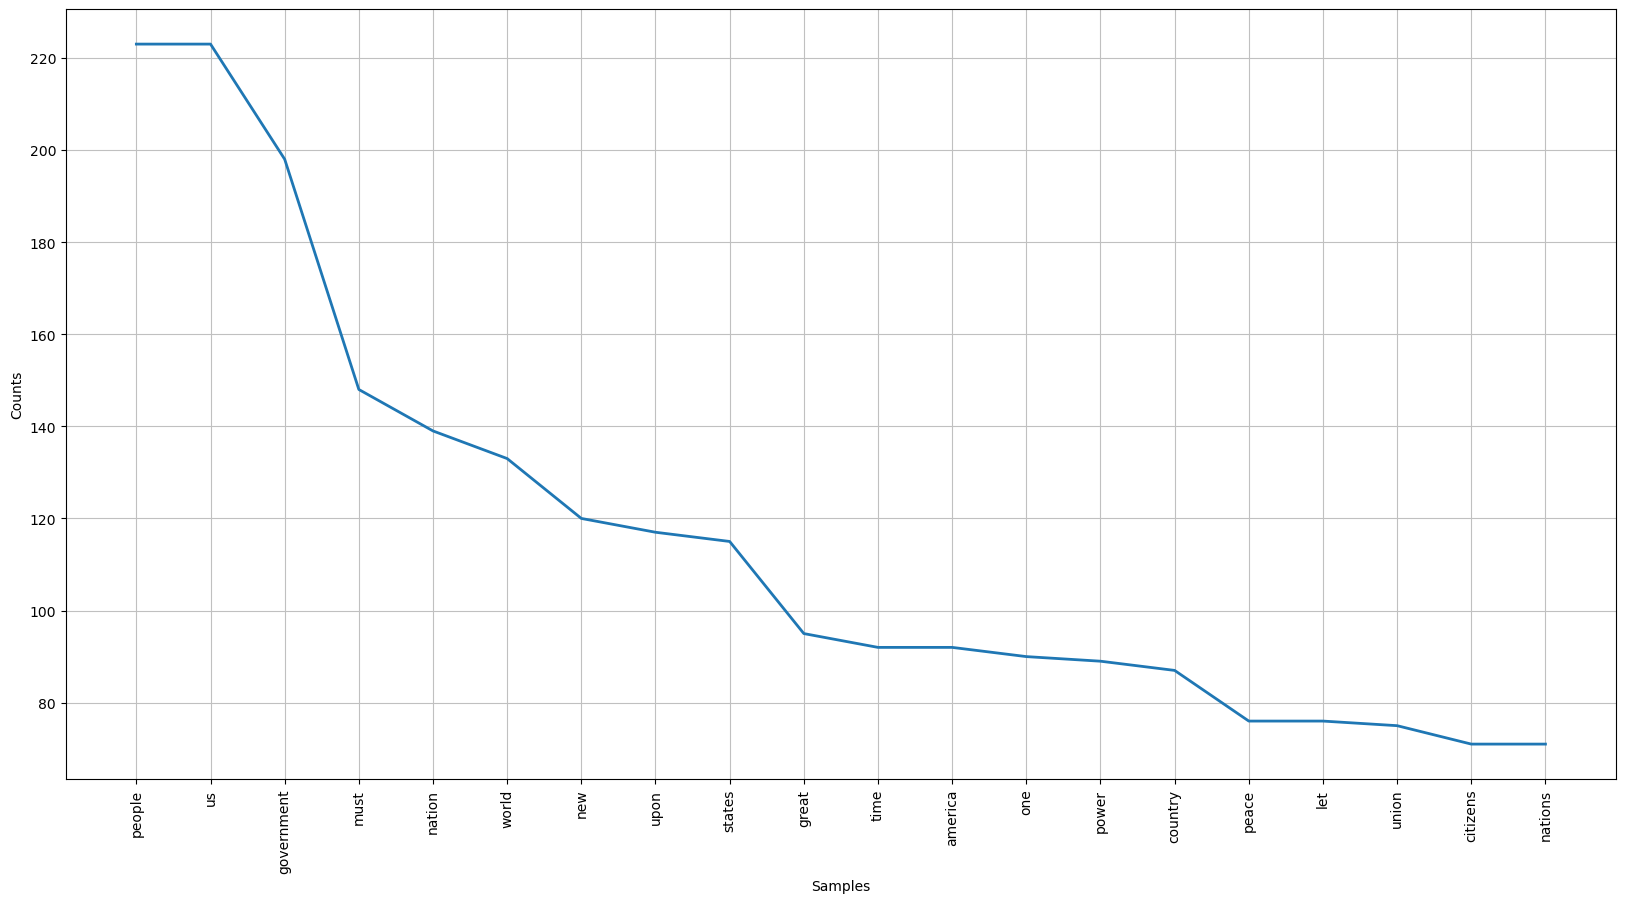

In [18]:
# Most common words in Democrat speeches
plt.figure(figsize=(20, 10))

# Initialize an empty list to store words from Democrat speeches
dem_words = []

# Loop through each president in the 'Democrats' list and extract words from their speeches
for president in Democrats:
    dem_words += list(inaugural.words(president))

# Convert the list of Democrat words into a single string (dem_text)
dem_text = ' '.join(dem_words)

# Write the Democrat speeches to a text file
donkey = 'Dem_Speeches.txt'
with open(donkey, 'w') as file:
    file.write(dem_text)
print(f'Content written to {donkey} successfully.')

# Tokenize the text into words by splitting (though word_tokenize() would be more robust)
fdist = FreqDist(dem_text.split())

# Filter out stopwords from the Democrat speech words (converting to lowercase for consistency)
clean_dem = [word.lower() for word in dem_text.split() if word.lower() not in stopwords and word.isalpha()]

# Calculate the frequency distribution of the cleaned words
fdist2 = FreqDist(clean_dem)

# Print the two most common words
x = fdist2.most_common(2)
print(x)

# Plot the 20 most common words from the cleaned Democrat speeches
fdist2.plot(20)


In [19]:
# Here's where I use read
with open(donkey, 'r') as file: 
    lines2 = file.read()  
print(lines)

['So, first of all, let me assert my firm belief that the only thing we have to fear is…fear itself — nameless, \n', 'unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life \n', 'a leadership of frankness and of vigor has met with that understanding and support of the people themselves which is essential to victory.']


# Insight

The frequency distributions of Republican and Democrat inaugural speeches reveal a shared focus on inclusivity, with common words like "we," "people," and "us." However, Republicans emphasize national identity, action, and unity, with frequent use of words like "great," "country," and "America," reflecting a focus on patriotism and collective responsibility. In contrast, Democrats highlight governance and global relations, with words like "government," "world," and "nations" appearing more often, suggesting a greater focus on the role of government and international diplomacy. Both parties stress the need for action, but Republicans seem more focused on national greatness, while Democrats lean toward governance and peace.

In [21]:
!pip install beautifulsoup4

### Scraping
That's great that we can analyze text that is pre-processed in the NLTK package. But what if NLTK doesn't have the text we want? I mean as awesome as Jane Austen and inaugural texts are.... 

Text scraping, also known as web scraping or data scraping, refers to the process of automatically extracting text data from websites or other online sources. Over my 14 years, I have seen companies and websites realize that they should not just easily give away their text data. Scraping used to be easy. Data used to be easy to grab from the internet. It's gotten harder for some sites, but others allow access, or simply haven't gotten around to restricting it. **WHEN SCRAPING, PLEASE MAKE SURE YOU ARE NOT VIOLATING TERMS OF USE**. Usually, these apply to commercial use, and for research or academic purposes, there are fewer restrictions. 

Below is some code for you to scrape a website. The package is called "Beautiful Soup" I have given you code below to use.

I have given you TWO websites to scrape. PLEASE PICK ONE of TWO. Either:

A speech from Christine LaGrande on Sustainable Development Goal: Here is the url: https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals' OR

"Joint Statement of the Russian Federation and the People’s Republic of China on the International Relations Entering a New Era and the Global Sustainable Development" Feb, 2022. Here is the url: http://www.en.kremlin.ru/supplement/5770

In [23]:
# Import necessary libraries: requests to make HTTP requests and BeautifulSoup for parsing HTML content
import requests
from bs4 import BeautifulSoup

# Define the URL for the IMF article
base_url = 'https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals'

# Send a GET request to the URL and store the response
r = requests.get(base_url)

# Parse the HTML content of the response
soup = BeautifulSoup(r.text)

# Find all paragraph tags <p> in the HTML and extract their text content
paragraphs = soup.find_all('p')

# Loop through each paragraph and print its text content
for p in paragraphs:
    print(p.get_text())

The IMF Press Center is a password-protected site for working journalists.
Christine Lagarde
The IMF Press Center is a password-protected site for working journalists.
PRESS CENTER
 Sign up to receive free e-mail notices when new series and/or country items are posted on the IMF website. 
 Modify your profile
By Christine Lagarde,
Managing Director, International Monetary Fund
September 17, 2018

Good evening.


I am honored to join you tonight, for this inaugural lecture in memory of a
remarkable woman—Dame Helen Alexander. I want to extend a special greeting
to her husband Tim; her children Nina, Leo, and Gregory; and all of her
family and friends gathered here this evening. Thank you Zanny for your
kind invitation and thank you John for your gracious introduction. Let me
also acknowledge Carolyn Fairbairn from the Confederation of British
Industry, and all here from UBM and the University of Southampton.


Each of us cherish our memories, images, words of Helen. How can we
describe 

5 pts Modify the text above to write the text to a list called "document"


In [25]:
# Initialize an empty list to store cleaned text
document = []

# Loop through each paragraph, clean up the text by replacing newlines and stripping extra spaces
for p in paragraphs:
    text = p.get_text().replace('\n', ' ').strip()
    
    # Append the cleaned text to the document list
    document.append(text)

5 pts Write the code to a file called "document.txt"

In [27]:
# Define the filename and join the list of document texts into a single string
filename1 = 'document.txt'
content = ''.join(document)

# Write the concatenated content to the file
with open(filename1, 'w') as file:
    file.write(content)

# Print confirmation message after writing to the file
print(f"Content written to {filename1} successfully.")

Content written to document.txt successfully.


20 pts Clean the document of any extraneous elements, remove stopwords and perform a word frequency distribution analysis on your document, showing and then plotting the top 20 words

[('SDGs', 16), ('countries', 15), ('Helen', 14), ('world', 13), ('IMF', 12), ('economic', 12), ('percent', 12), ('inequality', 12), ('global', 10), ('SDG', 10), ('need', 9), ('also', 8), ('people', 8), ('low-income', 8), ('would', 7), ('education', 7), ('social', 7), ('turn', 7), ('sector', 7), ('women', 7)]


<Axes: xlabel='Samples', ylabel='Counts'>

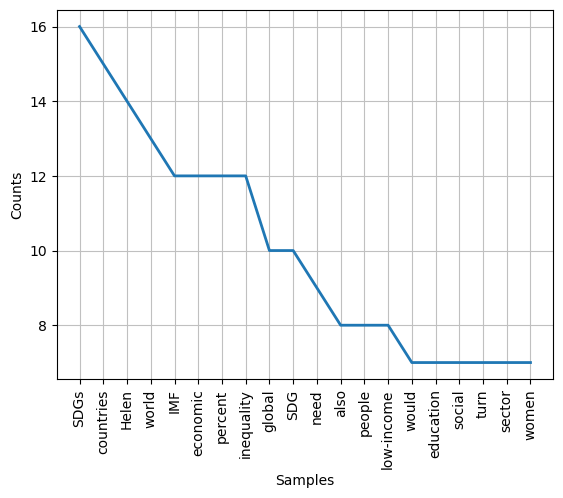

In [29]:
# Import necessary modules from NLTK for stopword removal, frequency distribution, and tokenization
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Retrieve English stopwords and extend with additional custom stopwords
stopwords_list = stopwords.words("english")
new_stops = [",", "I", ".", ";", "-", "'", ":", "-", '', '©','?', "’", "``"]  # Including additional symbols to remove
stopwords_list.extend(new_stops)

# Open and read the content of the file
with open(filename1, 'r') as file:
    text = file.read()

# Tokenize the text into individual words
words = word_tokenize(text)

# Filter out stopwords (case-insensitive) from the tokenized words
clean_imf = [word for word in words if word.lower() not in stopwords_list]

# Create a frequency distribution of the cleaned words
fdist = FreqDist(clean_imf)

# Print the 20 most common words
x = fdist.most_common(20)
print(x)

# Plot the frequency distribution of the top 20 words
fdist.plot(20)


5 pts Please read the speech. What does the word frequency tell us, if anything, about the speech? Please answer in a short paragraph that tells me how the word frequency distribution is good at finding meaning, but also may miss the meaning that you gained from actually reading the article.

Your paragraph here:

Word frequency analysis in this speech could highlight key themes such as "SDGs," "economic," "inclusion," "inequality," "climate," and "governance," reflecting the central focus on sustainable development and global challenges. High-frequency words may reveal the speech's emphasis on topics like poverty reduction, education, gender equity, and environmental sustainability, showing what the speaker deemed important. However, word frequency can miss deeper nuances. For example, it might not capture the emotional tone or personal reflections on Dame Helen Alexander's legacy, her virtues, or the moral undertones. By reading, we grasp the personal connections, the values of leadership, and the speech's tribute to Helen, which word frequency alone might overlook.

### Intro to Summarization
Summarization has been a thorny problem for data scientists over the past decade. There have been many approaches, but most, until ChatGPT and it's use of the transformers' architecture, they have been unsatisfactory. There are two main types of summarization:

Extractive Summarization: Finding the most important sentences and rendering them verbatim.

Abstractive Summarization: Taking the most important ideas from a document and generating a summary based on them

There have been many different algorithms that have attempted summarization. Let's learn about one of the most used and deploy it in python.

#### Luhns Heuristic Method
This is one of the earliest approaches of text summarization. This is related to our manual interpretation of the importance of word frequency in a document.Basically, just as we did, Luhn recognized that word frequency and word significance is highly correlated, but only "important" words. The assumption that the most important sentences are those with the most significant words. Here is a nice short article that explains the algo in an accessible way: https://blog.fastforwardlabs.com/2016/03/25/h.p.-luhn-and-the-heuristic-value-of-simplicity.html

##### Sumy is a python package that has a lot of different commons summarization methods including LSA, LexRank and Luhn.

In [33]:
#install sumy package
!pip install sumy

Run the following code. Pass the document you want to summarize as a variable in the document part of the statement below. Use the variable that you saved the document into if it's something different.

PlaintextParser.from_string(document,Tokenizer("english"))

In [35]:
# Import the necessary modules for text summarization using the Luhn algorithm
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

# Join the document list into a single string
document_as_one = ' '.join(document)

# Create a PlaintextParser from the joined document using a tokenizer for English
parser = PlaintextParser.from_string(document_as_one, Tokenizer("english"))

# Initialize the Luhn summarizer
summarizer_luhn = LuhnSummarizer()

# Generate a summary consisting of 2 sentences
summary_1 = summarizer_luhn(parser.document, 2)

# Print each sentence in the generated summary
for sentence in summary_1:
    print(sentence)

And she came to this conclusion with her legendary pragmatism—by “shining a light on the data.” As she once said in an interview: "If we’re all from the same group, from the same kind of background, if we’re given a problem we tend to get stuck at the same place.
So my fundamental point here is that if we are to succeed with the SDGs, we will need greater diversity in the business world—to raise economic dynamism and to help orient business and finance toward the longer-term investments needed for SDG success.


10 pts Evaluate the Luhn summarization below on the document you selected in the previous problem. How did it do?

Your evaluation here:

This summary captures two key ideas from the speech: the importance of using data to inform decisions and the role of diversity in achieving the Sustainable Development Goals (SDGs). The reference to Helen Alexander's "legendary pragmatism" and her approach of "shining a light on the data" effectively reflects her data-driven mindset. Additionally, the summary emphasizes the central point about the need for diversity in the business world, which is aligned with the speech's argument that diverse perspectives foster innovation and long-term success. However, it condenses two different ideas into one paragraph, and while accurate, it might benefit from clearer separation between Helen’s personal pragmatism and the broader point about diversity's role in SDG success. Overall, it effectively captures the essence of these sections, but could be refined for clarity.

10 pts Now look at the documentation for Sumy and use the Lex Rank summarization algo.

In [38]:
# Your code here:
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

document_as_one = ' '.join(document)

# Creating a parser and tokenizer for the text
parser = PlaintextParser.from_string(document_as_one, Tokenizer("english"))

# Using LexRankSummarizer to summarize the document
summarizer_lex_rank = LexRankSummarizer()

# Summarizing the document to 2 sentences
summary_lex_rank = summarizer_lex_rank(parser.document, 2)

# Printing the sentences in the summary
for sentence in summary_lex_rank:
    print(sentence)

Economic Dimension Let me begin with the economic dimension—where I would like to focus on the particular SDG challenges of the low-income countries.
What is the role of the IMF in this?


How does Lex Rank work? Explain it to me and evaluate the differences in the two algos.

5 pts Your explanation and evaluation here:

LexRank is a graph-based algorithm that ranks sentences by their similarity and importance within the document, applying a variation of PageRank to identify the most central sentences. It captures relationships between sentences and is well-suited for summarizing longer, more complex texts where sentence interconnectivity is crucial. In contrast, the Luhn algorithm focuses on word frequency and clustering within individual sentences, scoring sentences based on how many important words they contain. Luhn is simpler and faster but treats sentences in isolation, making it more appropriate for shorter texts or when a quick, keyword-based summary is needed. While LexRank excels in thematic coherence, Luhn is more direct in identifying key content based on word importance.

#### Using ChatGPT for Summarization
Now use Chatgpt to perform extractive and abstractive summarization on your document. Copy and paste into prompt. You will see that the document may be too long, so you may have to break the document into parts. Does where you break your document impact the summarization?

5 pts Copy and paste your prompt and the ChatGPT extractive summarization here:

summarize this 

"Good evening.


I am honored to join you tonight, for this inaugural lecture in memory of a
remarkable woman—Dame Helen Alexander. I want to extend a special greeting
to her husband Tim; her children Nina, Leo, and Gregory; and all of her
family and friends gathered here this evening. Thank you Zanny for your
kind invitation and thank you John for your gracious introduction. Let me
also acknowledge Carolyn Fairbairn from the Confederation of British
Industry, and all here from UBM and the University of Southampton.


Each of us cherish our memories, images, words of Helen. How can we
describe her? Some of the words I hear often: fiercely intelligent,
tenacious, meticulous, pragmatic, diligent, and utterly dedicated. I also
hear: compassionate, fair, thoroughly decent, a fabulous mentor: a role
model and someone who always put human relationships first, whether family
or friends. We are all in her debt, because she gave so much. I have a
personal debt to Helen because I once let her down.


When pondering this dual set of virtues associated with Helen—and having in
mind some of the most pressing challenges facing the world that Helen
tracked so closely—I thought it would be appropriate to focus my remarks on
the Sustainable Development Goals (SDGs), endorsed by the community of
nations in 2015 as a policy roadmap through 2030.


The SDGs lay out the contours of the world we want, and indeed need—a world
free of poverty and deprivation; a fairer world; a world that respects
natural limits. They represent the interlinked “5 Ps” of prosperity, people, planet, partnerships, and peace.


The SDGs are the right response to the great challenges of the 21    st century, the right antidote to the loss of trust in
institutions of all kind, and, in some countries, the loss of faith in
global cooperation.


Here’s the rub, though: turning these aspirations into concrete plans will
not be easy. It will require those traits that defined the character of
Helen—practicality twinned with decency.


The SDG agenda is an encompassing one. My focus tonight will be more
limited—the overlap between the SDGs and the IMF mandate for global
economic stability and economic prosperity that is both inclusive and
sustainable.


Specifically, I will address four dimensions: (i) economic—helping
the low-income countries achieve the SDGs; (ii) social—the
importance of inclusion and equity; (iii) environmental—tackling
climate change; and (iv) governance—the centrality of strong
institutions.


1. Economic Dimension


Let me begin with the economic dimension—where I would like to focus on the
particular SDG challenges of the low-income countries.


Consider some facts. Over a billion people have lifted themselves out of
extreme poverty since 1990, in the context of greater integration. This is
a remarkable achievement, unprecedented across the entire span of human
history. Yet almost 800 million people remain mired in extreme poverty
today.


With health too, child mortality has fallen by half since 1990, thanks in
no small part to the Millennium Development Goals, the precursor of the
SDGs. And yet, despite this massive reduction, almost 6 million children
still die each year before their fifth birthday—and in nearly all cases,
basic medical interventions could save their lives.


The same is true with education—great progress, but great gaps remaining.
In sub-Saharan Africa, about a fifth of primary age children are not
attending school. And too many of those in school are not learning. Across
the world, 58 percent of students in primary and lower secondary school—617
million children—do not have basic proficiency in reading and mathematics.


According to UNESCO, world poverty would be cut in half if all completed
secondary education. And given what we know about the future of work, how
can anybody thrive in the modern economy without at least a secondary
education?


As H.G. Wells once noted, "Human history becomes more and more a race between education and
catastrophe."

I could make similar points about the economic effects of lack of access to
the other material bases of human flourishing—healthcare, clean water and
sanitation, clean energy, and availability of finance to help people
protect themselves and get ahead.


I know Helen cared passionately about these issues. She understood the
critical importance of education attuned to modern challenges, relishing
her role as Chancellor of the University of Southampton. She loved seeing
the excitement in the faces of the graduates as she handed out degrees.


On healthcare too, she was so proud of the cancer immunology center at
Southampton. She ran the Race for Life every year since 2002, even in 2015,
on the eve of major surgery. When people she knew were ill, she would
always visit them in hospital.


We at the IMF appreciate that human capital is essential for growth and
development. We are committed to supporting these SDGs by offering help on
the macroeconomic side.


Specifically, we are estimating spending needs for five key
sectors—education, health, water and sanitation, roads, and electricity—for
both emerging markets and low-income countries. And we are exploring
financing solutions.


Next week, I will be presenting these findings at a special session of the
United Nations called by Secretary General Guterres. I will not preempt the
results here, but I will say this: for the low-income countries in
particular, meeting the additional spending needs will require a strong
partnership between all stakeholders—countries themselves, but also
official donors, philanthropy, and private finance. I am optimistic that
this can be done.


There are some added complications to grapple with, however. The need to
increase spending comes at a time when debt in low-income countries is
looking increasingly precarious—40 percent of them now face high risk of
debt distress or are unable to service their debt fully, up from 21 percent
five years ago. On top of that, low-income countries are borrowing more on
non-concessional terms, increasing interest service costs.


If implementing the SDGs is a race, it is increasingly an uphill one.


Ultimately, supporting the SDGs in the low-income countries must be a
global priority. It is not only the right thing to do; it is the smart
thing to do. It is not only about solidarity; it is about self-interest.
For without sustainable development at home, the bubbling economic and
social pressures—made worse by rapid population growth and growing
environmental stress—will surely spill across borders, including through
mass movements of peoples.


This is why partnerships are so important. What is required is a sense of
co-responsibility for the common good—underpinned by that blend of
practicality and humanity that defined Helen’s character. I can only
imagine how she would have encouraged the CBI members when she was leading
them.


2. Social Dimension


Let me now turn to the second broad dimension of the SDGs—inclusion, both
in terms of income inequality and gender equity.


Income inequality has become one of the global economy’s greatest
challenges. Indeed, some regions have seen remarkable progress in reducing
poverty and expanding the middle class over the past few decades. And
inequality has been reduced between countries. But not    within countries.


Since 1980, the top one percent globally has seen twice as much of the
gains from growth as the bottom 50 percent. Over that period, income
inequality has been on the rise in most advanced economies. This is partly
due to technology, partly due to global integration, and partly due to
policies that favor capital over labor.


The implications are alarming, especially among these advanced economies.
In these countries, rising inequality is contributing to the withering away
of entire communities and ways of life; the unravelling of social cohesion
and sense of a common destiny; and the growing tendency to replace
deliberation with demonization, partnership with parochialism.


Naturally, this makes it much harder to reach agreement on the kinds of
policies and partnerships needed for the SDGs.


It is also not surprising that IMF research has found that reducing
inequality is associated with stronger and more sustainable growth.


A key issue here is that excessive inequality can undermine the idea of a
meritocratic society, as a small minority gain privileged access to the
many tangible and intangible benefits needed to get ahead—whether it is
education, cultural enrichment, or well-placed connections. Such exclusion,
whereby inequality of outcomes feeds through to inequality of
opportunities, hurts productivity because it deprives the economy of the
skills and talents of those who are excluded.


Again, I know this was something that Helen cared deeply about—a
meritocratic society, a desire to make sure that everyone could use the
opportunities available to them and fulfil their potential.


As Maxim Gorky once said, "Everybody lives for something better to come. That's why we want to be
considerate of every man—who knows what's in him, why he was born and
what he can do?"

When it comes to reducing inequality, our research suggests an important
role for public investment in areas such as health, education, and social
protection systems. Given the scale of the problem, the private sector also
has a role to play. Indeed, as we face the challenges associated with the
Fourth Industrial Revolution, we should urge business to think of new ways
to strengthen and expand their economic and social responsibility.


And what about that other dimension of inclusion—gender equity?


The sad reality is that girls and women all over the world continue to face
the daily indignities of discrimination, harassment, and too often violence
as well.


Even focusing on the economic dimension alone, the news is sobering. About
90 percent of countries have some legal restriction on women’s economic
activity.


This is another area where inclusion makes for good economics. Here in the
UK, as Helen herself flagged in her famous Hampton-Alexander Review,
eliminating gender gaps in labor force participation can boost GDP by 5 to
8 percent.


At the IMF, we have shown that this story is repeated all over the world.
In sub-Saharan Africa, for example, we estimate that lowering gender
inequality by 10 percentage points could boost growth by 2 percentage
points over five years. We clearly need this growth boost to support the
SDGs.


The beauty of this is that men need not lose out. By bringing more women
into the fold, the economy can benefit from their talents, skills, unique
perspectives and ideas. This diversity should boost productivity, and lead
to higher wages for all.


How do we increase this participation? Especially in low-income countries,
key interventions include reducing gender gaps in health and education,
supporting financial inclusion, investing in infrastructure, and ensuing
better access to clean water and sanitation. This creates a virtuous
cycle—invest in the SDGs and boost women’s empowerment, which in turn lays
the groundwork for broader SDG success. In advanced economies, policies
such as parental leave and access to affordable and high-quality childcare
can help a lot.


Another crucial dimension is the need to boost female leadership in the
corporate world. Again, evidence suggests that this leads to better
outcomes—one study shows that adding one more woman in senior management or
to a corporate board raises the return on assets by 8-13 basis points.


In fact, just today, the IMF released a study—which we might say is in
honor of Helen—showing that in the financial sector, a higher share of
women on bank boards is associated with greater financial resilience. At
the same time, we find that more women on banking supervision boards is
associated with greater financial stability. Yet there is a long way to
go—across the globe, less than a fifth of bank board members and only two
percent of bank CEOs are women.


We know that more diverse views in leadership means less likelihood of
sinking into the quagmire of groupthink and unconscious biases. More
diverse views in leadership means more prudent decision-making and a
greater focus on longer-term sustainability. I think it is clear that
finance would benefit enormously from this greater diversity.


Helen understood all of this. I have already mentioned the
Hampton-Alexander Review, surely one of her great legacies. In this, one of
her main recommendations was to raise the share of women on executive
committees of FTSE 100 companies to 33 percent by 2020, up from 26 percent.
And she came to this conclusion with her legendary pragmatism—by “shining a
light on the data.”


As she once said in an interview: "If we’re all from the same group, from the same kind of background, if
we’re given a problem we tend to get stuck at the same place. If we
have different backgrounds and different skills and different cultural
heritage, we come out of problems more quickly."

Helen’s own experience shows that this is more than hollow words. In her
two decades at the helm of The Economist—as Zanny knows well, on
the 175th anniversary of that fine publication—she raised circulation from
under 400,000 to almost 1.4 million a week. And at a time when print sales
were declining everywhere.


So my fundamental point here is that if we are to succeed with the SDGs, we
will need greater diversity in the business world—to raise economic
dynamism and to help orient business and finance toward the longer-term
investments needed for SDG success. Again, I am optimistic that this can be
done.


3. Environmental Dimension


Let me now turn to the third SDG dimension—making sure that economic
progress respects the natural limits of the planet. With each passing year,
as heatwaves become habitual and storms become more frequent and ferocious,
climate change casts a growing shadow over our well-being and especially
the well-being of our children.


The moral is clear—if we turn on nature, nature will turn on us. In the
chilling words of T.S. Eliot, "I will show you fear in a handful of dust."

Yet there are signs of hope. A few months after the SDGs were signed, the
nations of the world coalesced around the Paris Agreement, committing
themselves to reducing carbon emissions—with the goal of stopping global
temperatures rising by more than 2 degrees Celsius over pre-industrial
levels. This was a momentous achievement, a remarkable testament to the
enduring power of multilateralism.


In turn, this commitment will entail moving toward a zero-carbon global
economy over the coming decades. This will not be easy, but I am convinced
that the world will be able to deploy its groundswell of global
consciousness to take the actions necessary to secure our collective
future.


What is the role of the IMF in this? We can help by offering advice on how
best to nudge this energy transition along.


The best way to do this is to put a price on carbon. Carbon pricing comes
with many advantages. It is easy to administer if done by integrating
carbon charges into fuel tax systems. It provides the right incentives for
all dimensions of decarbonization—better energy efficiency, shifting away
from fossil fuels in electricity generation, and moving toward
electrification in vehicles, buildings, and industrial processes. It can
reduce dangerous levels of air pollution. Plus, carbon taxes can raise
revenue of about 1-2 percent of GDP a year, which could be devoted to SDG
priorities.


Yet we have a long way to go—even after China’s emissions trading system
comes into force in 2020, 80 percent of global emissions will remain
unpriced.


Adaptation to this new normal will also be important. Vulnerable countries
will need to invest in areas such as coastal protection and more resilient
infrastructure and agriculture. They will need to better manage risk—for
example, through regional pooling schemes, contingency funds, and
catastrophe bonds.


The IMF is committed to helping our member countries build more resilient
policy frameworks. Our Climate Change Policy Assessments have evaluated
climate strategies in some of the most vulnerable countries—including
Belize, Seychelles and St. Lucia. We are also providing fast and flexible
emergency funding to countries hit by severe climatic shocks.


Again, I know this was something Helen cared about deeply. She certainly
understood the importance of sustainable practice in the business world.
Not many people realize that she trained as a geographer and was proud of
that!


4. Governance Dimension


Let me now turn to the fourth and final SDG pillar—good governance. In a
real sense, governance is the foundation upon which everything else is
built. If institutions are weak, the odds of SDG success are severely
handicapped. This is why the SDGs call for “effective, accountable and
inclusive institutions at all levels.”


This applies across the board—public sector and private sector,
domestically and globally. It applies to both donors and recipients of
official aid—to make sure that aid is delivered effectively and
transparently, reaching the people who actually need it, without waste,
diversion, or duplication. It applies to private corporations and to
state-owned enterprises—to make sure that their investments take place
transparently, on a level playing field, benefitting the citizens of the
country.


Let me say a few words about corruption, a true economic and social plague.


By undermining trust and delegitimizing institutions, corruption makes it
hard for countries to take the collective decisions needed to advance the
common good.


Think about it. If some do not pay their fair share of taxes, governments
cannot raise the revenue needed for SDG priorities. Even worse, the
legitimacy of the whole system is undermined. At the same time, if
corruption is rampant, governments might be tempted to spend money on
projects that generate kickbacks but little social value—again, undermining
the SDG agenda.


This is just the public sector. We also need the private sector to invest
in long-term, sustainable projects that support the SDGs. But they are
unlikely to do so if forced to pay a “corruption tax.” The genuine risks
and uncertainty that come with any investment decision will surely be
magnified by corruption.


The private sector is not always the innocent victim, of course.
Corporations and investors are sometimes too willing to offer bribes.
Financial sectors are sometimes too willing to accept dirty money.


Unsurprisingly, IMF research has found that corruption and weak governance
is associated with lower growth, investment, and tax revenue collection—and
with high inequality and social exclusion.


So what is the solution? Criminal enforcement is essential, of course, but
on its own is not enough. Our evidence shows that successful
anti-corruption initiatives are built on institutional reforms that
emphasize transparency and accountability—for example, shining a light on
all aspects of the government budget.


For this reason, the IMF is stepping up its engagement on governance and
corruption, focusing precisely on strong economic institutions. And when we
find corruption to be macroeconomic in magnitude, we will not shy away from
saying so.


A related problem is the massive extent of tax avoidance and tax evasion.
One estimate is that the wealth in offshore financial centers reaches 10
percent of global GDP. Again, this makes it really difficult to finance the
SDGs.


As we all know so well, the values of good governance were Helen’s values.
I cannot think of a single person with more honesty, impartiality, and
integrity. In her many leadership positions, transparency and
accountability were her lodestars. That is what people loved about her,
what engendered such fierce loyalty from all who worked with her. It is
what drove her remarkable success. There is a lesson there for all of us.


Conclusion


Before I conclude tonight, let me check if you have been paying attention.


I quoted Maxim Gorky and H.G. Wells. What do they have in common? Well,
besides being great writers and storytellers, they were both lovers of
Helen’s grandmother, the indomitable Russian aristocrat Moura Budberg!
Clearly, Helen’s family boasts many generations of strong women.


It is on this theme of generations that I would like to end tonight.
Because whether or not we succeed with the SDGs will define this
generation’s legacy.


In the musical Hamilton—playing to such acclaim here in London—the
main protagonist, Alexander Hamilton, ponders a key question just before he
is killed in a duel. “What is a legacy,” he asks. He answers: “It’s planting seeds in a garden you never get to see.”


Helen Alexander left behind a remarkable legacy. She left us far too early,
and she never got to see the full fruits of the beautiful seeds that she
planted. But the next generation will- her children, her students, and all
those whose life she illuminated with her charming and witty smile.


I hope we can all bequeath a similar legacy when it comes to the SDGs. We
owe it to those who will come after us.


Thank you very much."

Output: 

"The speaker delivers an inaugural lecture in honor of Dame Helen Alexander, reflecting on her remarkable qualities—intelligence, compassion, and leadership—and her deep commitment to education, healthcare, and sustainable development. The speaker highlights Helen’s legacy, particularly in promoting gender equity and diversity in leadership.

The speech focuses on the Sustainable Development Goals (SDGs), addressing four key dimensions:

Economic: The need to support low-income countries in achieving the SDGs, particularly in education, healthcare, and infrastructure, despite challenges such as rising debt.
Social: The importance of addressing income inequality and gender inequality, noting how inclusion can boost growth and development.
Environmental: The urgent need to combat climate change through initiatives like carbon pricing and sustainable practices.
Governance: The role of strong institutions in achieving SDGs, particularly in fighting corruption and promoting transparency.
The speaker concludes by celebrating Helen's lasting legacy, encouraging the audience to pursue these goals for future generations."

5 pts Does breaking the document in different places impact the summarization? Answer here:

Breaking the document in different places can impact the summarization because it may disrupt the flow of information and context. When the entire text is provided at once, it allows for a more cohesive and comprehensive summary. If the document is sent in parts, the summarization might focus on individual sections without fully capturing the overall structure and key themes of the entire text.

5 pts Watch this video, and be prepared for a quiz on it! 
https://www.youtube.com/watch?v=wjZofJX0v4M&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=5
